# Problema de Clasificación: Iris Dataset

- [Importamos librerias y dataset](#Importamos-librerias-y-dataset)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Train-Test Split](#Train-Test-Split)
- [Logistic Regression](#Logistic-Regression)
- [Matriz de confusión](#Matriz-de-confusión)

## Importamos librerías y dataset

### Importamos librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(15,10)})

import warnings
warnings.filterwarnings('ignore')

/Users/ari/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


### Importamos dataset desde el archivo csv

In [3]:
df = pd.read_csv('iris.csv', index_col=0)

In [4]:
df.shape

(150, 5)

In [5]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


#### Hay valores nulos?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## Exploratory Data Analysis

#### Vemos como esta distribuido el dataset. Esta balanceado?

In [7]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### FacetGrid

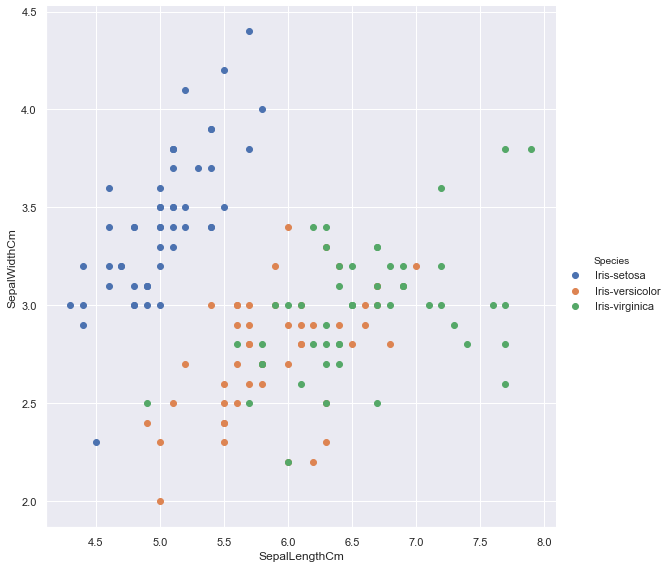

In [8]:
sns.FacetGrid(df, hue="Species", size=8).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend();

### Pairplot

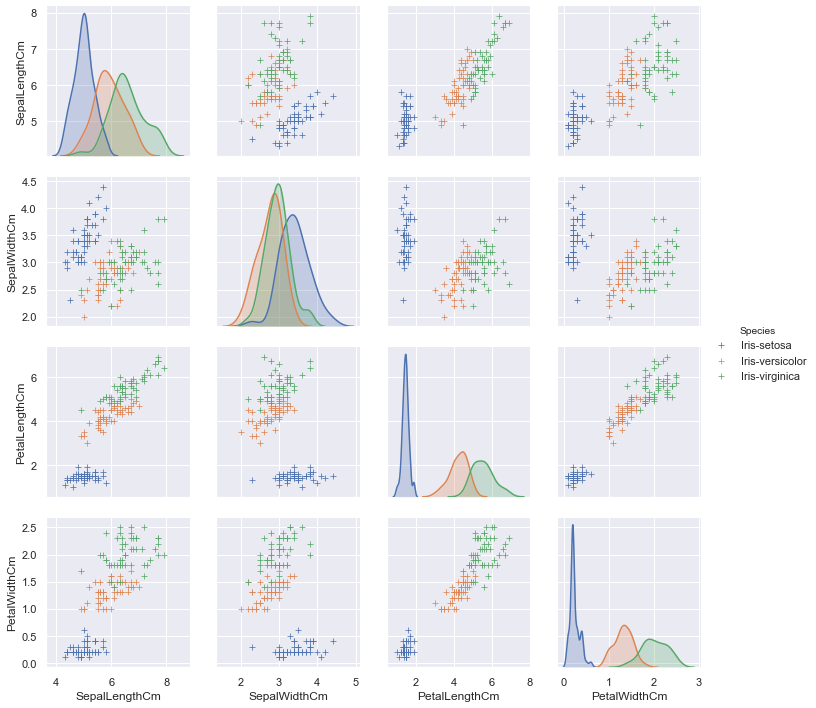

In [9]:
g = sns.pairplot(df, hue='Species', markers='+')
plt.show()

### Boxplot: Petal Length

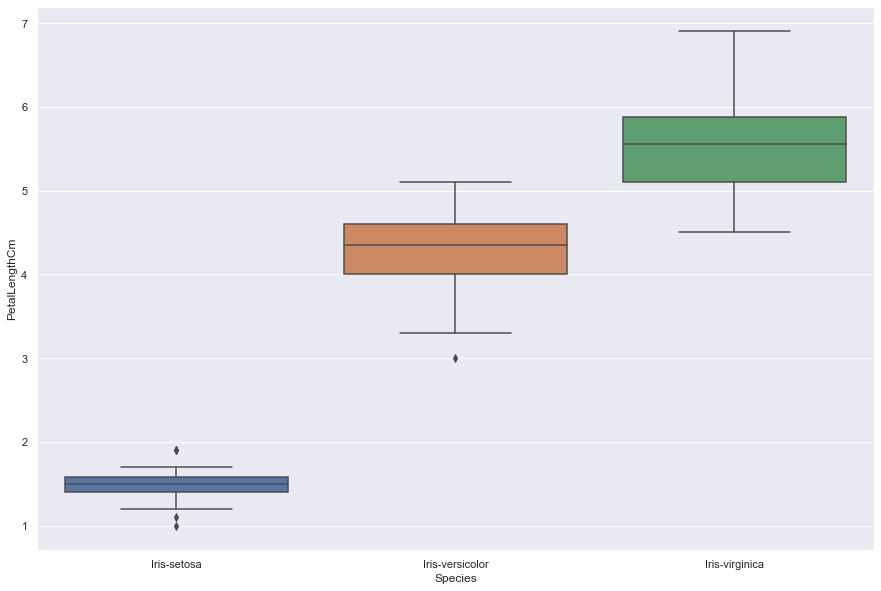

In [10]:
sns.set(rc={'figure.figsize':(15,10)})

sns.boxplot(x="Species", y="PetalLengthCm", data=df);

### Stripplot

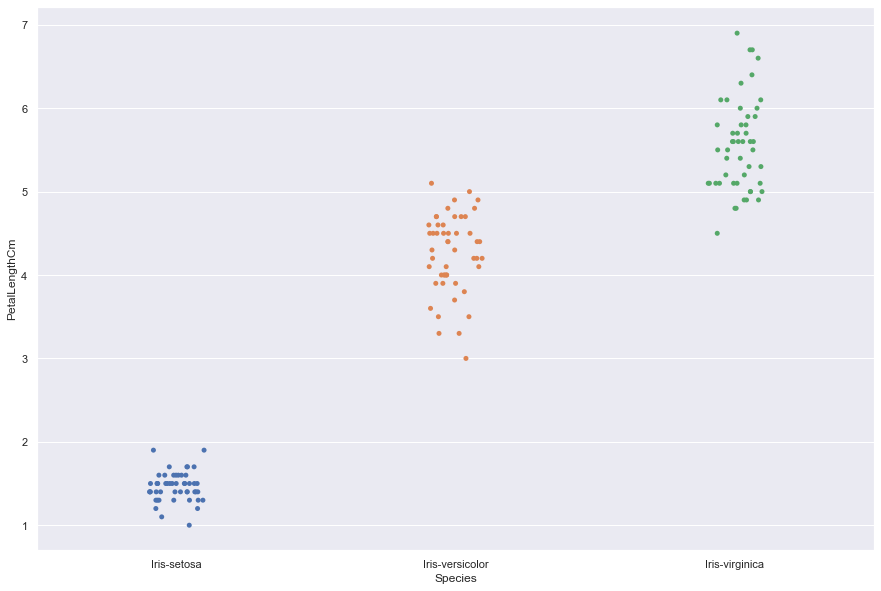

In [11]:
sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray");

### Violinplot

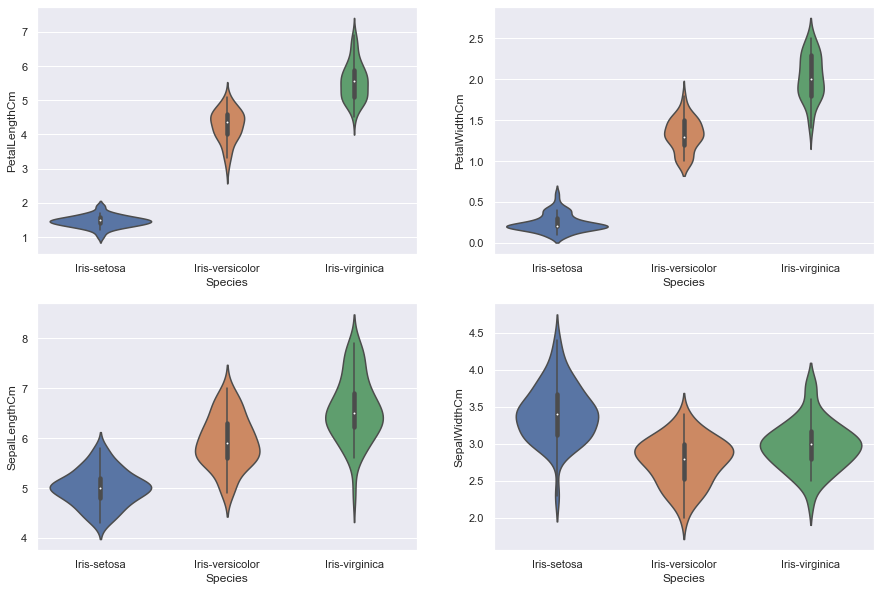

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df);
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df);
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df);
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df);

### Heatmap: analisis de correlacion entre las 4 variables

- El ancho y la longitud del sepalo no están correlacionados 
- El ancho y la longitud del pétalo están altamente correlacionados

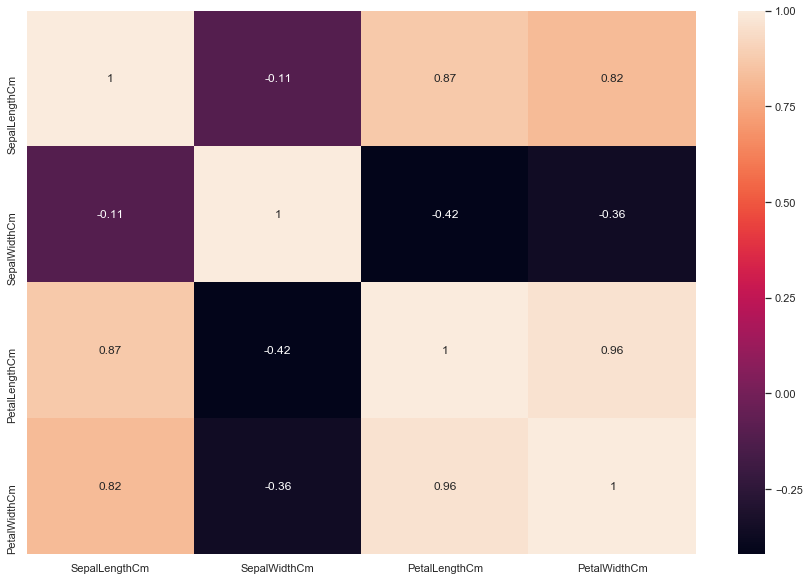

In [13]:
sns.heatmap(df.corr(),annot=True);

## Train-Test Split

#### Armamos las matrices X e y:

In [14]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df["Species"]

In [15]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [16]:
y.head()

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

#### Hacemos el train-test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42)

In [18]:
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [19]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
82,5.5,2.4,3.7,1.0
134,6.3,2.8,5.1,1.5
138,6.4,3.1,5.5,1.8
76,6.6,3.0,4.4,1.4
110,7.2,3.6,6.1,2.5


## Logistic Regression

#### Instancio el modelo:

In [20]:
model = LogisticRegression()

#### Lo entreno utilizando el set de entrenamiento (X y y):

In [21]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Una vez entrenado, utilizo el modelo para predecir mi set de testing:

In [22]:
y_pred = model.predict(X_test)

#### Puedo evaluar la performance del modelo utilizando distintas métricas, por ejemplo el Accuracy:

In [23]:
print('El accuracy es:',accuracy_score(y_pred,y_test).round(3))

El accuracy es: 0.978


###  Matriz de confusión

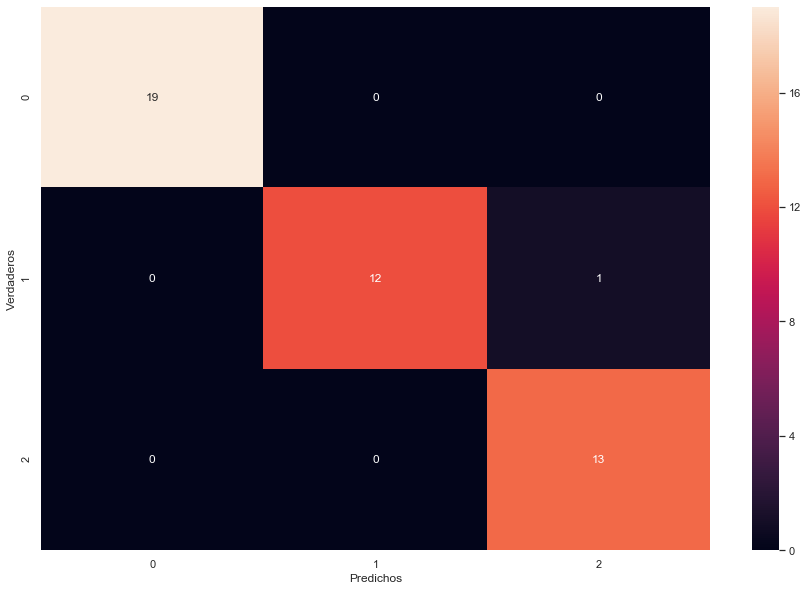

In [24]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

## Como hago para utilizar el modelo para predecir nuevos valores?

In [25]:
X_test.head(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
74,6.1,2.8,4.7,1.2


In [26]:
y_test.head(1)

Id
74    Iris-versicolor
Name: Species, dtype: object

In [27]:
medidas = [6,3,5,1]

In [28]:
model.predict([medidas])

array(['Iris-versicolor'], dtype=object)